### Perfome EDA

In [1]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Let's load data from the local computer. Df is the name of my Dataframe.
df = pd.read_csv(r"C:\Users\cleme\Documents\Data\student_enrollments_ml.csv")


In [3]:
df.head()

,campaigns,Enrollments
0,3,21
1,5,47
2,3,27
3,9,75
4,4,30


In [4]:
df.tail()

,campaigns,Enrollments
24,8,86
25,10,105
26,8,89
27,5,59
28,6,66


##### Exploaratory Data Analysis

In [5]:
#check first 5 rows by calling out the name of your dataframe. In this case the name of my database is df
df.head()

,campaigns,Enrollments
0,3,21
1,5,47
2,3,27
3,9,75
4,4,30


In [6]:
#show statistical 
df.describe()

,campaigns,Enrollments
count,29.000000,29.000000
mean,5.448276,55.379310
std,2.501231,26.352573
min,1.000000,17.000000
25%,3.000000,30.000000
50%,5.000000,59.000000
75%,8.000000,76.000000
max,10.000000,105.000000


In [7]:
# shows no of observations, datapoints, datatype & missing data if any.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   campaigns    29 non-null     int64
 1   Enrollments  29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


In [8]:
#to check the names of all columns
df.columns

Index(['campaigns', 'Enrollments'], dtype='object')

##### Finding Missing Values

In [9]:
#check missing values
df.isnull()

,campaigns,Enrollments
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [10]:
# show the total sum of missing values
df.isnull().sum()

campaigns      0
Enrollments    0
dtype: int64

In [11]:
#check duplicate values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [12]:
# Check for any duplicate if any
df.duplicated().any()
df

,campaigns,Enrollments
0,3,21
1,5,47
2,3,27
3,9,75
4,4,30
5,2,20
6,9,88
7,6,60
8,8,81
9,3,25


- There are 29 observations with 2 columns of datatypes int64
- No missing value recorded
- Contains duplicates

In [13]:
# Remove duplicate 
df=df.drop_duplicates()
df

,campaigns,Enrollments
0,3,21
1,5,47
2,3,27
3,9,75
4,4,30
5,2,20
6,9,88
7,6,60
8,8,81
9,3,25


- Duplicate row has been removed.

### Descriptive Statistics

In [14]:
#check the overall output descriptive statistics for dataset
df.describe()

,campaigns,Enrollments
count,28.000000,28.000000
mean,5.535714,56.285714
std,2.501587,26.371782
min,1.000000,17.000000
25%,3.000000,30.000000
50%,5.500000,59.500000
75%,8.000000,77.250000
max,10.000000,105.000000


In [15]:
#to check the names of all columns
df.columns

Index(['campaigns', 'Enrollments'], dtype='object')

In [16]:
#converting column names to lower case
lc = []
for i in range(len(df.columns)):
    lc.append(df.columns[i].lower())
df.columns = lc
df

,campaigns,enrollments
0,3,21
1,5,47
2,3,27
3,9,75
4,4,30
5,2,20
6,9,88
7,6,60
8,8,81
9,3,25


In [17]:
# Find correlation from the table
df.corr()

,campaigns,enrollments
campaigns,1.000000,0.968836
enrollments,0.968836,1.000000


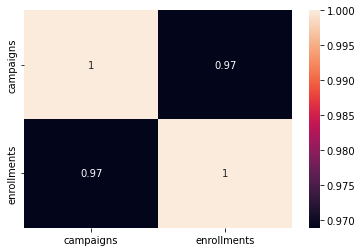

In [18]:
# Visualize the correlation between the columns 
df_viz = sns.heatmap(df[['campaigns','enrollments']].corr(), annot=True)

- There is a strong positive relationship between number of campaigns launched and number of students that enrolled.

In [19]:
# Check categorical columns that needs to be converted to numeric columns. O is AKA object
cat_columns = [x for x in df.columns if df[x].dtype == 'O']
cat_columns

[]

In [20]:
# Check categorical columns that needs to be converted to numeric columns. O is AKA object
num_columns = [x for x in df.columns if df[x].dtype == 'int64']
num_columns

['campaigns', 'enrollments']

### Linear Regression Algorithm

In [21]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

#### Split data into Train and Test

In [22]:
# Define the features or independent variable
X = df.drop(['enrollments'], axis=1)
# Define the label or dependent variable
y = df['enrollments']

In [23]:
# Split the data into training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#to check the shape of the data after spliting.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22, 1), (6, 1), (22,), (6,))

#### Create the Model and Fit the Model.

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #linearregression() function assigned to regressor
regressor.fit(X_train, y_train) #regressor.fit() performs the actual training on X and y.

LinearRegression()

In [25]:
y_pred = regressor.predict(X_test)
y_pred

array([28.76053963, 70.95278246,  7.66441821, 18.21247892, 18.21247892,
       60.40472175])

In [26]:
#to retrieve the slope or coef
print(regressor.coef_)

#to retrieve the intercept
print(regressor.intercept_)

[10.54806071]
-2.8836424957841515


- For every marketing campaign launched, there is ~ 11 enrolled student.

#### Evaluating the model

In [27]:
#check prediction score
regressor.score(X_test, y_test)

0.9500335759329622

- 95% accurate

#### Predicting the test results

In [28]:
#now, lets see the prediction on which th accuracy level is achieved.
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,27,28.760540
1,76,70.952782
2,17,7.664418
3,24,18.212479
4,20,18.212479
5,62,60.404722


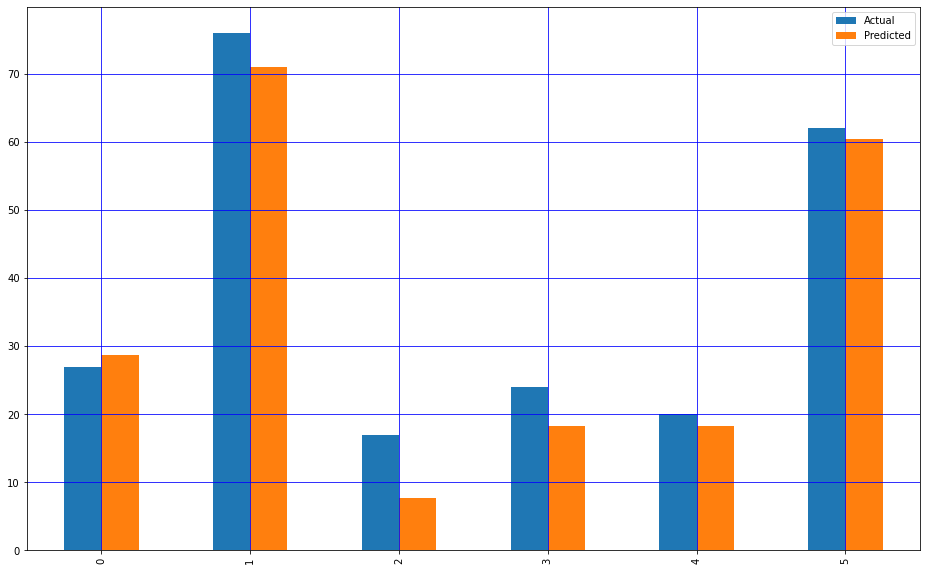

In [29]:
# Visualize the accuracy of the model
df1 = df.head(6)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.8', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='red')
plt.show()

In [30]:
print(regressor.intercept_, regressor.coef_, regressor.score(X, y))

-2.8836424957841515 [10.54806071] 0.9367318269733885


### Model Validation

In [31]:
#let's validate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 4.218943226531757
Mean Squared Error: 25.82708941776221
Root Mean Squared Error: 5.082035952033615
r2: 0.9500335759329622
